In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
data = pd.read_csv('data/transformed_data.csv', index_col=0)

# General overview
## Number of instances vs time (of the year)

In [4]:
#number of instances over the years
data.year.value_counts().sort_index()

2013     2702
2014    11179
2015    11481
2016     1367
Name: year, dtype: int64

### Number of observations over time per year

<AxesSubplot:xlabel='month', ylabel='count'>

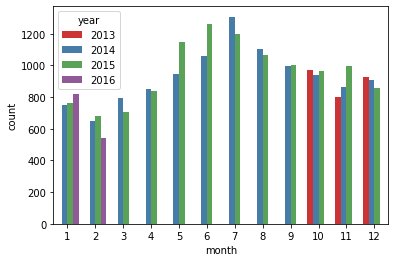

In [5]:
sns.countplot(data=data, x="month", hue="year", palette="Set1")

### Number of observations over time averaged per month

<AxesSubplot:xlabel='month', ylabel='count'>

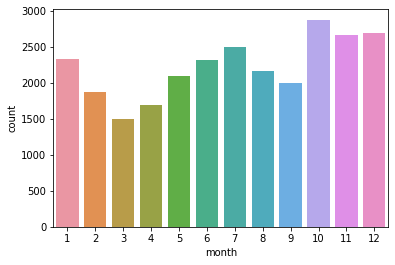

In [6]:
sns.countplot(data=data, x="month")

## Number of Dogs and Cats

<AxesSubplot:xlabel='AnimalType', ylabel='count'>

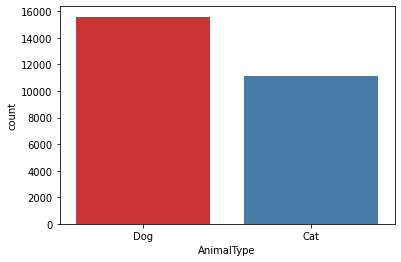

In [7]:
sns.countplot(data=data, x="AnimalType", palette='Set1')

## Rates of different outcomes (also over time)

In [8]:
#counts of the different outcomes
data.OutcomeType.value_counts().sort_index()

Adoption           10769
Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
Name: OutcomeType, dtype: int64

Now we will see how the share of different outcomes change with the month of the year

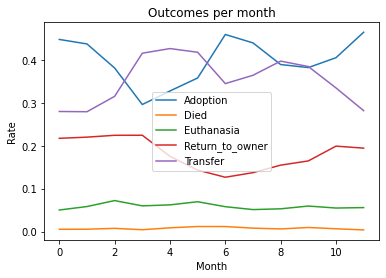

In [9]:
share_of_outcomes = np.zeros((12, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for m in range(1, 13):
    share_of_outcomes[m - 1] = data[data.month == m].OutcomeType.value_counts().sort_index()
    share_of_outcomes[m - 1] = share_of_outcomes[m - 1] / np.sum(share_of_outcomes[m - 1])

share_of_outcomes = share_of_outcomes.T

plt.title('Outcomes per month')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Month")
plt.ylabel("Rate")
plt.show()

And the same over multiple years:

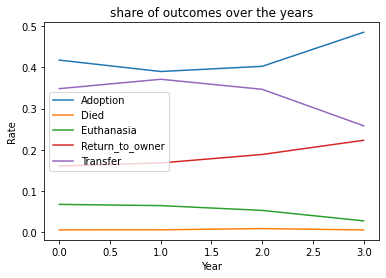

In [10]:
#now the same over the years
share_of_outcomes = np.zeros((4, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for y in [2013, 2014, 2015, 2016]:
    share_of_outcomes[y - 2013] = data[data.year == y].OutcomeType.value_counts().sort_index()
    share_of_outcomes[y - 2013] = share_of_outcomes[y - 2013] / np.sum(share_of_outcomes[y - 2013])

share_of_outcomes = share_of_outcomes.T

plt.title('share of outcomes over the years')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Year")
plt.ylabel("Rate")
plt.show()

Here we have a kind of nice insight that the rates of adoption and return to owner increase over the years, but the rate of transfer decreases over the years.

## Age distribution

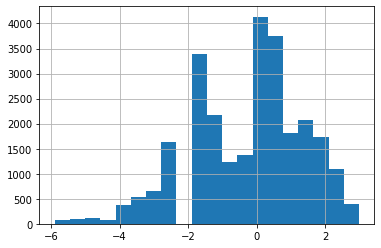

In [11]:
# sns.distplot(data.AgeuponOutcome, bins = 20, kde=False)
# TODO @Lukas what to the negative values mean?
data[data.AgeuponOutcome != 0].AgeuponOutcome.apply(np.log).hist(bins=20)
plt.show()

## Outcomes vs. sex and neutralization

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

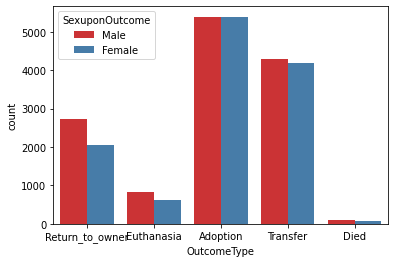

In [12]:
#plot outcomes in relation to the sex
sns.countplot(data=data, x="OutcomeType", hue="SexuponOutcome", palette='Set1')

# for s in ['Male','Female']:
#     data_ = data[data.SexuponOutcome == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by sex')
# plt.legend()
# plt.show()

seems like there are only minor differences

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

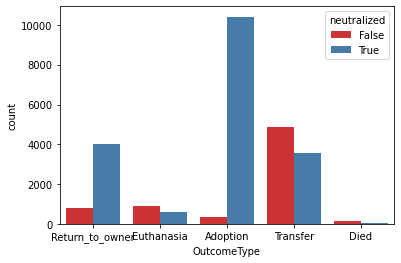

In [13]:
#plot outcomes in relation to neutralization
sns.countplot(data=data, x="OutcomeType", hue="neutralized", palette='Set1')

# for s in [True,False]:
#     data_ = data[data.neutralized == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by neutralization')
# plt.legend()
# plt.show()

Now thats interesting!

## Outcomes for dog vs. cat

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

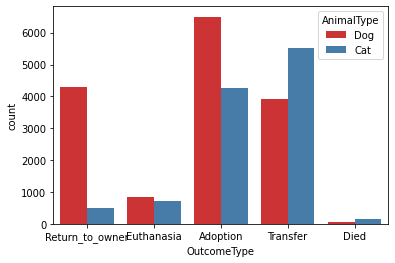

In [14]:
#plot outcomes in relation to the kind of animal
sns.countplot(data=data, x='OutcomeType', hue='AnimalType', palette="Set1")

# for s in ['Dog','Cat']:
#     data_ = data[data.AnimalType == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by kind of animal')
# plt.legend()
# plt.show()

This also seems interesting!

## Outcome by maturity
We consider an animal to be an adult if its older than 1 year and check if this has an influence on its outcome.

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

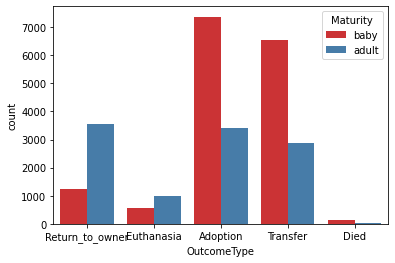

In [15]:
plot_data = data.copy()
plot_data['Maturity'] = ["baby" if x <= 1 else "adult" for x in data["AgeuponOutcome"]]

sns.countplot(data=plot_data, x="OutcomeType", hue="Maturity", palette='Set1')

Unsurprisingly younger animals get adopted more often.

## Outcome by age timeline

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Outcome by Age')]

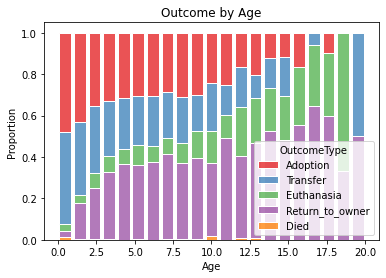

In [16]:
plot_data = data.copy()
plot_data["AgeuponOutcome"] = plot_data["AgeuponOutcome"].round(decimals=0)
x, y, hue = "AgeuponOutcome", "proportion", "OutcomeType"

plot_data = plot_data[hue].groupby(plot_data[x]).value_counts(normalize=True).rename(y).reset_index()

ax = sns.histplot(
    plot_data,
    x=x,
    weights=y,
    hue=hue,
    multiple='stack',
    palette="Set1",
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    bins=21
)

#specfiy axis labels
ax.set(xlabel='Age',
       ylabel='Proportion',
       title='Outcome by Age')


Text(0.5, 0.98, 'Outcome by Age')

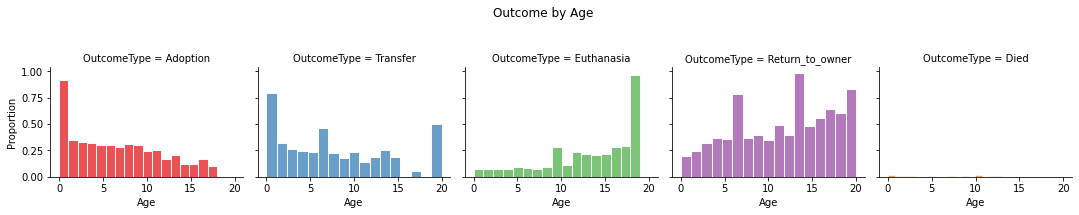

In [17]:
# Alternative plot for the stacked bar chart
hist_wrap = sns.FacetGrid(plot_data, col=hue, hue=hue, palette="Set1")
hist_wrap.map_dataframe(sns.histplot, x=x, weights=y, edgecolor='white', bins=17)
hist_wrap.set(xlabel='Age',
       ylabel='Proportion')
hist_wrap.fig.subplots_adjust(top=0.7)
plt.suptitle('Outcome by Age')

## summary statistics of colors - not cleaned

### cats

In [18]:
data[data.AnimalType == 'Cat'].Color.nunique() #number of unique cat colors

146

In [19]:
data[data.AnimalType == 'Cat'].Color.value_counts() #list of cat colors and their prevalence

Brown Tabby                1635
Black                      1441
Black/White                1094
Brown Tabby/White           940
Orange Tabby                841
Tortie                      530
Calico                      517
Orange Tabby/White          455
Blue Tabby                  433
Blue                        385
Torbie                      335
Blue/White                  288
Blue Tabby/White            241
Cream Tabby                 198
White/Black                 168
Lynx Point                  168
Seal Point                  136
White                       125
White/Brown Tabby            97
Flame Point                  85
Cream Tabby/White            79
White/Blue                   76
Torbie/White                 60
White/Orange Tabby           52
Black Smoke                  45
Black Tabby                  42
Lilac Point                  39
Gray Tabby                   35
Tortie/White                 33
Tortie Point                 32
Blue Point                   29
Silver T

In [20]:
data[data.AnimalType == 'Cat'].Breed.nunique() #number of cat breeds

60

### dogs

In [21]:
data[data.AnimalType == 'Dog'].Color.nunique() #number of dog colors

262

In [22]:
data[data.AnimalType == 'Dog'].Color.value_counts() #list of dog colors and their prevalences

Black/White                    1730
Brown/White                     882
Black                           851
White                           806
Tan/White                       773
Tricolor                        751
Black/Tan                       672
Brown                           637
Tan                             627
White/Brown                     562
White/Black                     475
Brown Brindle/White             450
Black/Brown                     435
Blue/White                      414
White/Tan                       389
Red                             337
Brown/Black                     332
Red/White                       331
Brown Brindle                   232
Chocolate/White                 221
Sable                           198
Buff                            195
Yellow                          185
Tan/Black                       183
Cream                           136
Chocolate                       127
White/Brown Brindle             115
Fawn/White                  

## Cleaning OutcomeSubtype & Breed

In [23]:
data.OutcomeSubtype.value_counts(dropna=False) #a lot of NA values

NaN                    13612
Partner                 7816
Foster                  1800
SCRP                    1599
Suffering               1002
Aggressive               320
Offsite                  165
In Kennel                114
Behavior                  86
Rabies Risk               74
Medical                   66
In Foster                 52
Enroute                    8
Court/Investigation        6
At Vet                     4
In Surgery                 3
Barn                       2
Name: OutcomeSubtype, dtype: int64

In [24]:
data_wop = data #assigning the cleaning procedure to a different variable for now to keep initial summary statistics for comparison

In [25]:
data_wop = data_wop.drop(["OutcomeSubtype"], axis = 1)

In [26]:
data_wop["Mix"] = data_wop.Breed.str.contains("Mix") #creating new boolean column for Mix

In [27]:
data_wop["Breed"] = data_wop['Breed'].str.replace(" Mix", "")

In [28]:
data_wop["Breed"] = data_wop['Breed'].str.replace("/.*", "")

c:\users\alexa\pycharmprojects\animal-shelter-analysis\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [29]:
data[data.AnimalType == 'Dog'].Breed.nunique()

1320

In [30]:
data_wop[data_wop.AnimalType == 'Dog'].Breed.nunique() #reduced unqiue breeds by over 1000

187

In [31]:
data_wop[data_wop.AnimalType == 'Dog'].Breed.value_counts() #looks good for now but maybe we could still drop entries <4 for outlier reduction?

Chihuahua Shorthair                   2145
Pit Bull                              2113
Labrador Retriever                    1915
German Shepherd                        826
Australian Cattle Dog                  511
Dachshund                              510
Boxer                                  360
Border Collie                          334
Miniature Poodle                       310
Australian Shepherd                    229
Yorkshire Terrier                      226
Jack Russell Terrier                   222
Miniature Schnauzer                    220
Beagle                                 220
Catahoula                              218
Rat Terrier                            215
Siberian Husky                         194
Rottweiler                             181
Shih Tzu                               176
Chihuahua Longhair                     168
Cairn Terrier                          142
Pointer                                139
Great Pyrenees                         131
American Bu

In [32]:
data[data.AnimalType == 'Cat'].Breed.nunique()

60

In [33]:
data_wop[data_wop.AnimalType == 'Cat'].Breed.nunique() #still a reduction by about 50%, but initial values were much lower anyway

33

In [34]:
data_wop[data_wop.AnimalType == 'Cat'].Breed.value_counts() #again still some outlier reduction might be useful?

Domestic Shorthair      8958
Domestic Medium Hair     883
Domestic Longhair        547
Siamese                  426
Snowshoe                  78
Manx                      48
Maine Coon                47
Russian Blue              35
Himalayan                 18
Persian                   14
Ragdoll                   12
American Shorthair         9
Angora                     7
Japanese Bobtail           6
Balinese                   5
Bombay                     5
Bengal                     5
British Shorthair          4
Tonkinese                  4
Pixiebob Shorthair         3
Devon Rex                  2
Javanese                   2
Exotic Shorthair           2
Sphynx                     2
Abyssinian                 2
Turkish Van                2
Cymric                     2
Cornish Rex                1
Burmese                    1
Ocicat                     1
Munchkin Longhair          1
Norwegian Forest Cat       1
Havana Brown               1
Name: Breed, dtype: int64

In [35]:
data_wop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            19038 non-null  object 
 1   DateTime        26729 non-null  object 
 2   OutcomeType     26729 non-null  object 
 3   AnimalType      26729 non-null  object 
 4   SexuponOutcome  25635 non-null  object 
 5   AgeuponOutcome  26711 non-null  float64
 6   Breed           26729 non-null  object 
 7   Color           26729 non-null  object 
 8   year            26729 non-null  int64  
 9   month           26729 non-null  int64  
 10  neutralized     25635 non-null  object 
 11  Mix             26729 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.5+ MB


In [36]:
data_wop.to_csv('data/transformed_data_wop.csv',index_label='AnimalID')